# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

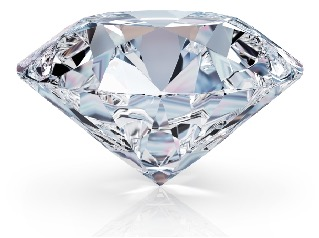

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIAMONDS_DATASET = "data/diamonds_good.csv"

In [3]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [4]:
df.head(10)

carat        cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23      Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75
5    NaN  Very Good     J    VVS2   62.8   57.0  336.0  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0  336.0  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0  337.0  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0  337.0  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0  338.0  4.00  4.05  2.39

In [5]:
df.tail()

carat        cut color clarity  depth  table   price   'x'   'y'   'z'
53935   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

In [6]:
df.sample(3)

carat        cut color clarity  depth  table   price   'x'   'y'   'z'
5120    0.91  Very Good     H     SI1   62.7   56.0  3762.0  6.14  6.18  3.86
28874   0.32      Ideal     J      IF   62.2   56.0   684.0  4.41  4.37  2.73
49141   1.05       Good     E      I1   64.1   58.0  2066.0  6.46  6.32  4.09

## Исследование данных

Размер датасета

In [7]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Основные числовые характеристики

In [9]:
df.describe()

carat         depth         table         price           'x'  \
count  53442.000000  52950.000000  53940.000000  53940.000000  53940.000000   
mean       0.797561     61.749422     57.457184   3932.799722      5.731157   
std        0.473534      1.431558      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                'y'           'z'  
count  53935.000000  53940.000000  
mean       5.734469      3.538734  
std        1.142125      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [10]:
df.describe(include='object')

cut  color clarity
count   53940  53940   53940
unique      6      7       8
top     Ideal      G     SI1
freq    21524  11292   13065

In [11]:
df.describe(include='all')

carat    cut  color clarity         depth         table  \
count   53442.000000  53940  53940   53940  52950.000000  53940.000000   
unique           NaN      6      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21524  11292   13065           NaN           NaN   
mean        0.797561    NaN    NaN     NaN     61.749422     57.457184   
std         0.473534    NaN    NaN     NaN      1.431558      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price           'x'           'y'           'z'  
count   53940.000000  53940.000000  53935.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734469      3.538734  
std      3989.439738      1.121761      1.142125      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

In [12]:
df.duplicated().sum()

135

In [13]:
# df[условие фильтрации]

In [14]:
df[df.duplicated()]

carat    cut color clarity  depth  table   price   'x'   'y'   'z'
1005    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0  3105.0  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...     ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0  1919.0  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0  2093.0  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0  2130.0  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0  2203.0  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0  2579.0  5.21  5.18  4.09

[135 rows x 10 columns]

In [15]:
# df = df.drop_duplicates()

df.drop_duplicates(inplace=True)

df.shape

(53805, 10)

In [16]:
df.reset_index(inplace=True, drop=True)

df.head()

carat      cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75

In [17]:
df.reset_index(inplace=True, drop=True)
# df.drop('index', axis=1, inplace=True)

df.head()

carat      cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75

## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [18]:
df.isnull().mean() * 100

carat      0.925565
cut        0.000000
color      0.000000
clarity    0.000000
depth      1.839978
table      0.000000
price      0.000000
'x'        0.000000
'y'        0.009293
'z'        0.000000
dtype: float64

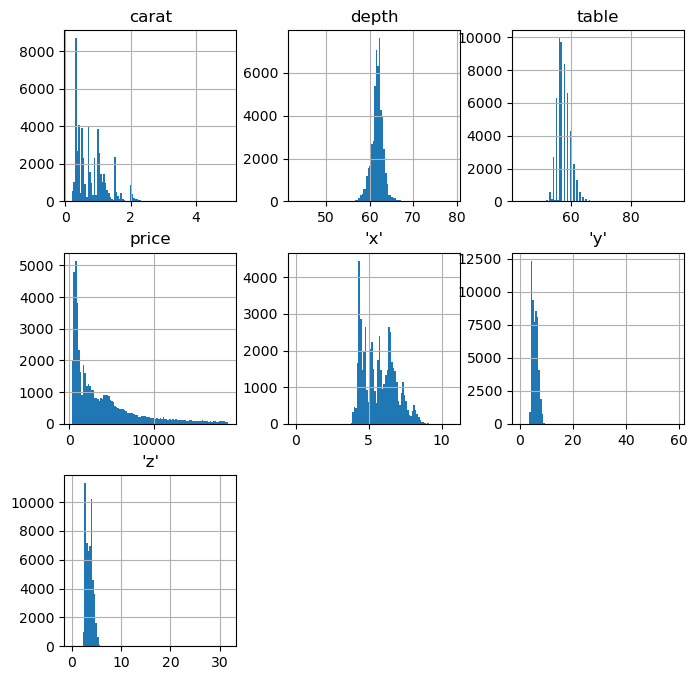

In [19]:
df.hist(bins=100, figsize=(8,8));

In [20]:
median_carat = df['carat'].median()

df['carat'] = df['carat'].fillna(median_carat)

In [21]:
median_depth = df['depth'].median()

df['depth'] = df['depth'].fillna(median_depth)

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [22]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

In [23]:
# ваш код здесь

median_y = df["'y'"].median()

df["'y'"] = df["'y'"].fillna(median_y)

In [24]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64

In [25]:
median_y

5.71

## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

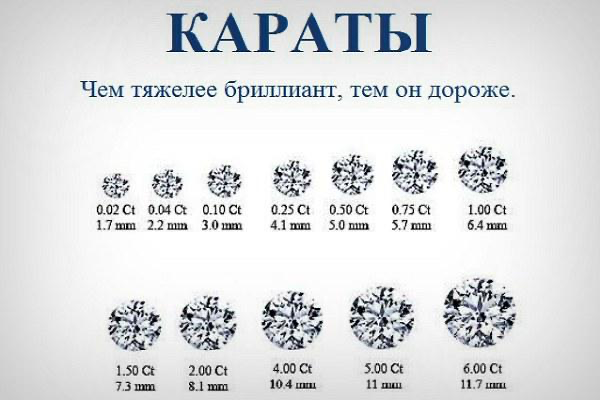

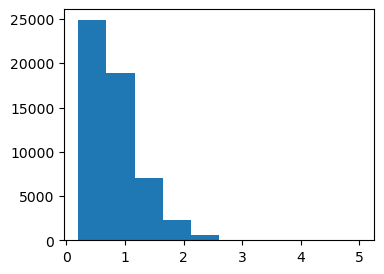

In [26]:
plt.figure(figsize=(4,3))

plt.hist(df['carat']);

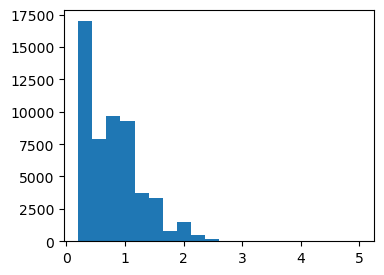

In [27]:
plt.figure(figsize=(4,3))

plt.hist(df['carat'], bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [28]:
df['carat'].min(), df['carat'].max()

(0.2, 5.01)

Сколько мелких бриллиантов в датасете?

In [29]:
len(df[df['carat'] < 0.3])

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [30]:
100 * len(df[df['carat'] >= 1]) / len(df)

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

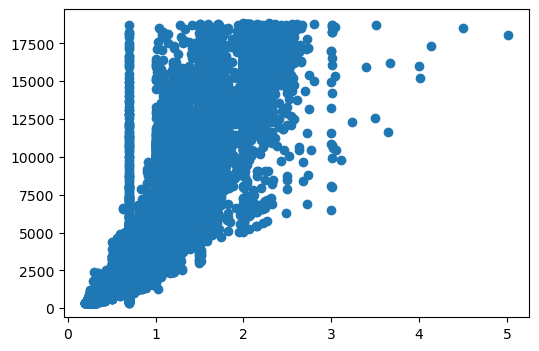

In [31]:
plt.figure(figsize=(6,4))

plt.scatter(df['carat'], df['price']);

In [32]:
np.corrcoef(df['carat'], df['price'])[0][1]

0.9164989435440215

### Cut (огранка алмаза)

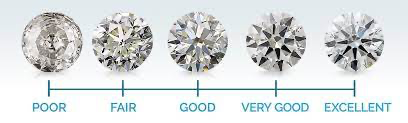

In [33]:
df['cut'].value_counts(normalize=True)

cut
Ideal        0.398941
Premium      0.255088
Very Good    0.224013
Good         0.090772
Fair         0.029700
Goood        0.001487
Name: proportion, dtype: float64

In [34]:
df['cut'] = df['cut'].replace('Goood', 'Good')

Посмотрим как влияет огранка алмаза на его стоимость

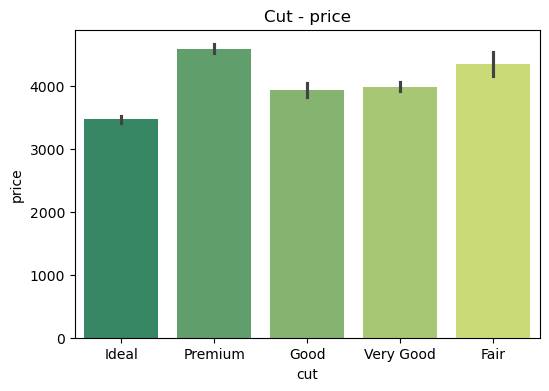

In [35]:
plt.figure(figsize=(6,4))

sns.barplot(data = df, x='cut', y='price', hue='cut', palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [36]:
# ваш код здесь
df.loc[df['cut'] == 'Fair', 'carat'].max()

5.01

Посчитаем среднюю стоимость алмазов в каждой категории

In [37]:
df.groupby('cut')['price'].mean()

cut
Fair         4347.735294
Good         3926.266317
Ideal        3462.593850
Premium      4581.864918
Very Good    3982.162781
Name: price, dtype: float64

Посчитаем несколько характеристик в зависимости от огранки

In [38]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean'))

PriceMean  PriceMedian  CaratMean
cut                                           
Fair       4347.735294       3282.0   1.040094
Good       3926.266317       3029.5   0.845796
Ideal      3462.593850       1813.0   0.703331
Premium    4581.864918       3175.0   0.889616
Very Good  3982.162781       2649.0   0.804177

In [39]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean')).sort_values(by='PriceMean', ascending=False)

PriceMean  PriceMedian  CaratMean
cut                                           
Premium    4581.864918       3175.0   0.889616
Fair       4347.735294       3282.0   1.040094
Very Good  3982.162781       2649.0   0.804177
Good       3926.266317       3029.5   0.845796
Ideal      3462.593850       1813.0   0.703331

## Table and Depth

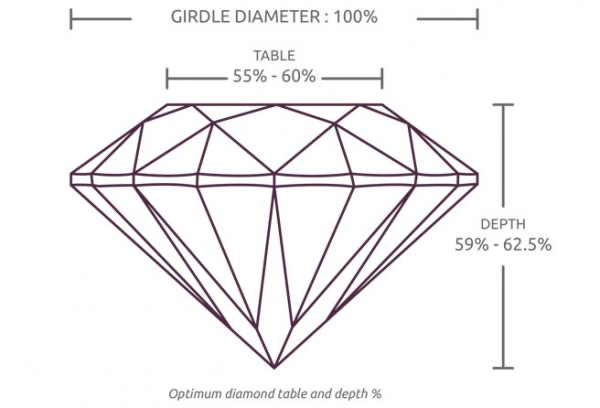

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [40]:
len(df[(df.table >= 55) & (df.table <= 60)]) / len(df)

0.8439364371340954

In [41]:
len(df.query("55 <= `table` <= 60")) / len(df)

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [42]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

In [43]:
# ваш код здесь

len(df.query("59 <= `depth` <= 62.5 & 55 <= `table` <= 60")) / len(df)

0.6206300529690549

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [44]:
# ваш код здесь
df['price'].median() > df.query("59 <= `depth` <= 62.5 & 55 <= `table` <= 60")['price'].median()

True

Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [45]:
np.corrcoef(df.table, df.price)[0][1]

0.12662153885758196

In [46]:
np.corrcoef(df.depth, df.price)[0][1]

-0.010831614226837222

## Clarity - прозрачность алмаза

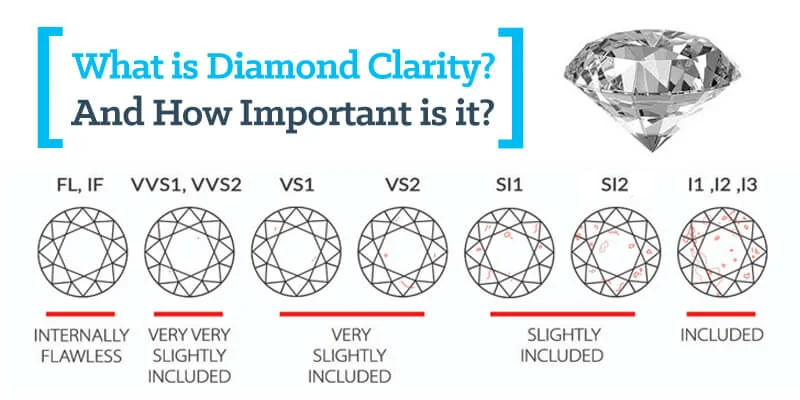

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [47]:
# ваш код здесь

df['clarity'].nunique()

8

In [48]:
df['clarity'].unique().tolist()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [49]:
# ваш код здесь

len(df.loc[df['clarity'].isin(['VVS2', 'VVS1'])])

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

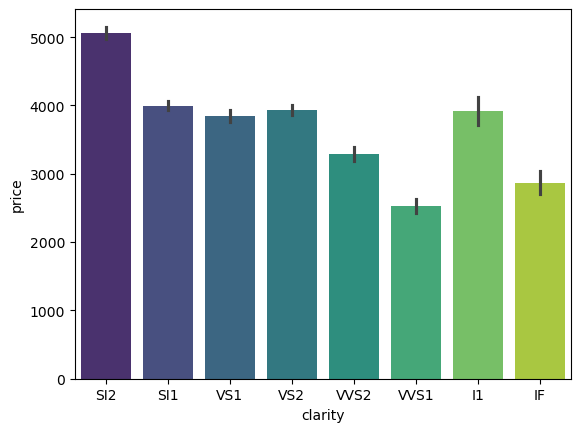

In [50]:
# ваш код здесь

sns.barplot(data=df, x='clarity', y='price', hue='clarity', palette='viridis')
plt.show();

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [51]:
# ваш код здесь

df[['cut', 'clarity', 'price']].groupby(['cut', 'clarity'])\
                             .agg(MeanPrice=('price', 'mean'), MedianPrice=('price', 'median'))\
                             .sort_values('MeanPrice', ascending=False)['MeanPrice'].idxmax()

('Premium', 'SI2')

## Pandas profiling

In [52]:
# !pip install ydata_profiling
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [53]:
from ydata_profiling import ProfileReport

In [54]:
df_copy = pd.read_csv(DIAMONDS_DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [55]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 55.38it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
profile_report.to_file('Diamonds_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Домашнее задание

## 1) x, y, z

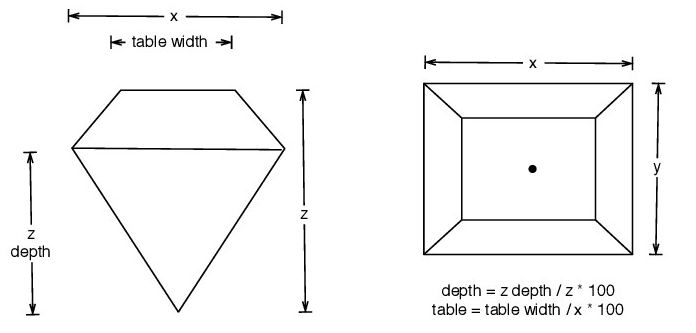

In [57]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

Переименуем колонки

In [58]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [59]:
# ваш код здесь
x_median, y_median, z_median = [df[col].median() for col in ('x', 'y', 'z')]
max(x_median, y_median, z_median)

5.71

Для каждого из этих столбцов вычислите минимальное значение.

In [60]:
np.min(df['x']), np.min(df['y']), np.min(df['z'])

(0.0, 0.0, 0.0)

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [61]:
# ваш код здесь
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].shape[0]

19

In [62]:
df.shape[0]

53805

### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [63]:
# ваш код здесь
df_copy = df.loc[~((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]
df_copy.shape[0]

53786

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [64]:
# ваш код здесь
df.corr(method='pearson', numeric_only=True)['price'].to_frame()

price
carat  0.916499
depth -0.010832
table  0.126622
price  1.000000
x      0.884551
y      0.865376
z      0.861271

### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

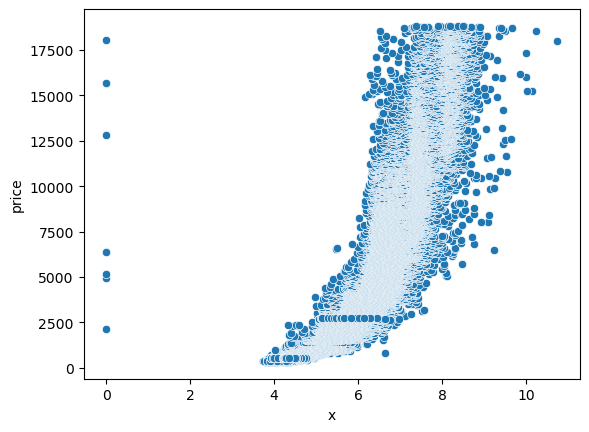

In [65]:
# ваш код здесь

sns.scatterplot(data=df, x='x', y='price')
plt.show();

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [66]:
# ваш код здесь
x_mean = df['x'].mean()
y_mean = df['y'].mean()
round(df.loc[(df['x'] > x_mean) & (df['y'] > y_mean)].shape[0] / df.shape[0] * 100)

47

### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [67]:
# ваш код здесь
df_big_carat = df_copy.loc[df_copy['carat'] >= 1]
z_median = df_copy['z'].median()
round(df_big_carat.loc[df['z'] < z_median].shape[0] / df_big_carat.shape[0], 4)

0.0002

## 2) Color

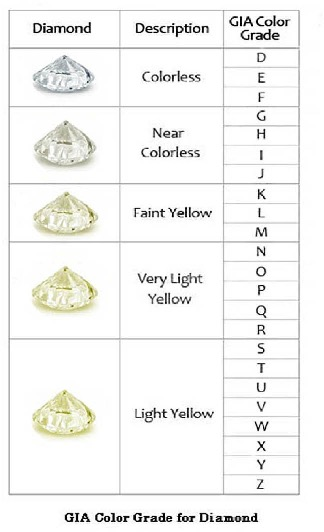

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [68]:
# ваш код здесь
sorted(df.color.unique())

['D', 'E', 'F', 'G', 'H', 'I', 'J']

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

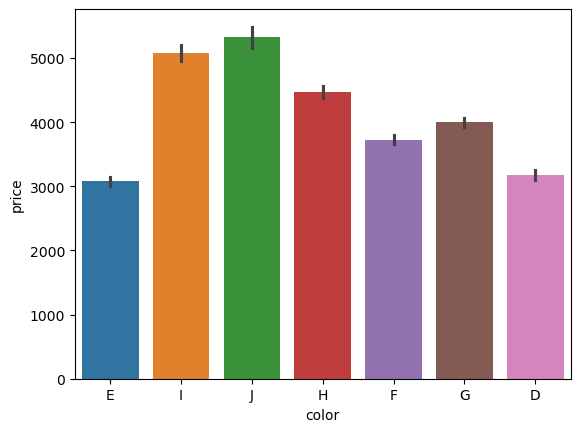

In [69]:
# ваш код здесь

sns.barplot(data=df_copy, x='color', y='price', hue='color', estimator='mean')
plt.show();

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [70]:
# ваш код здесь
df_copy.groupby('color').agg(CaratMedian=('carat', 'median'), PriceMedian=('price', 'median')).sort_values('PriceMedian', ascending=False)

CaratMedian  PriceMedian
color                          
J             1.11       4234.5
I             1.00       3721.5
H             0.90       3449.5
F             0.70       2345.0
G             0.70       2242.0
D             0.54       1842.0
E             0.54       1741.0

### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [71]:
# ваш код здесь
df_copy.groupby(['cut', 'color', 'clarity']).agg(PriceMean=('price', 'mean')).sort_values('PriceMean', ascending=False)

PriceMean
cut       color clarity              
Very Good D     IF       10298.260870
Good      D     IF       10030.333333
Ideal     J     I1        9454.000000
Premium   D     IF        9056.500000
          J     SI2       7550.285714
...                               ...
Good      E     IF        1519.222222
Ideal     I     IF        1509.404255
Fair      G     IF        1488.000000
Premium   H     VVS1      1453.758929
Very Good J     IF        1074.125000

[276 rows x 1 columns]

In [72]:
df_copy.groupby(['cut', 'color', 'clarity']).agg(PriceMean=('price', 'mean')).idxmax()

PriceMean    (Very Good, D, IF)
dtype: object